In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
datasetname='2nd-Cu-FEC2+-LR.csv'
strlist = datasetname.split('.') 
savename=strlist[0]
dataset = pd.read_csv(datasetname)
print(dataset.head())
col = dataset.columns.values.tolist()
headers =col[0:-1]
features = np.array(dataset[headers])
labels = dataset['FE-C2+']
PLOT_NAME = 'feature importance of GBDT model_'+str(savename)+'.png'
PLOT_NAME1 = 'permutation feature importance of GBDT model_'+str(savename)+'.png'
PLOT_NAME2 = 'Lasso linear model importance score of_'+str(savename)+'.png'
PLOT_NAME3 = 'linear regression importance score of_'+str(savename)+'.png'
PLOT_NAME4='voting regressor picture.png'
TXT_NAME2= 'dataforplot_regressors'+str(savename)+'.txt'

   alcoholic hydroxyl   phenolic hydroxyl   sulfhydryl  aliphatic amine  \
0                    0                   0           0                0   
1                    0                   0           0                0   
2                    0                   0           0                0   
3                    0                   0           0                0   
4                    0                   0           0                0   

   aromatic amine  carboxy   pyridine   imidazole  pyrrole   triazole   cyano  \
0               0         1          0          0         0          1      0   
1               0         0          0          1         0          0      0   
2               0         1          1          0         0          0      0   
3               0         1          1          0         0          0      0   
4               0         1          1          0         0          0      0   

   phosphate   alkynyl  FE-C2+  
0           0        0     3.

In [2]:
testsetname='24-predict-FEC2+.csv'
strlist = testsetname.split('.') 
testset = pd.read_csv(testsetname)
print(testset.head())
col = testset.columns.values.tolist()
testheaders =col[0:-1]
X_test = np.array(testset[testheaders])
y_test=testset['values']

   alcoholic hydroxyl   phenolic hydroxyl   sulfhydryl  aliphatic amine  \
0                    0                   0           0                0   
1                    0                   0           0                0   
2                    0                   0           0                0   
3                    0                   0           0                1   
4                    0                   0           0                1   

   aromatic amine  carboxy   pyridine   imidazole  pyrrole   triazole   cyano  \
0               0         1          1          0         0          0      0   
1               0         1          1          0         0          0      0   
2               0         1          1          0         0          0      0   
3               0         1          1          0         0          0      0   
4               0         1          1          0         0          0      0   

   phosphate   alkynyl  values  
0           0        0       

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
#for not only localph
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#localphfeature=np.array(origindata.iloc[:,:1])
X=features
y=labels
params = {'n_estimators': 2000,
          'max_depth': 10,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X,y)    
y_pred = reg.predict(X_test)

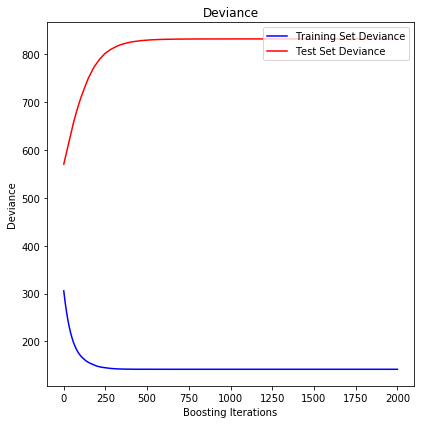

In [5]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [6]:
y_pred

array([25.73333333, 25.73333333, 25.73333333, 28.48476072, 28.48476072,
       28.48476072, 25.73333333, 25.73333333, 35.12941175,  7.27500003,
       22.675     , 25.73333333, 25.73333333, 25.73333333,  7.27500003,
        7.27500003, 35.12941175, 43.04285711, 43.04285711, 35.12941175,
       43.04285711, 35.12941175, 29.77142856, 38.76574916])

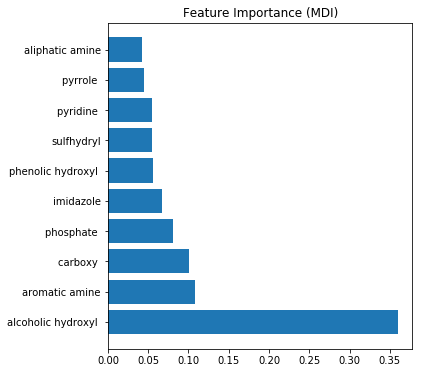

In [7]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(-feature_importance)
pos1 = np.arange(10) + .5
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.barh(pos1, feature_importance[sorted_idx[:10]], align='center')
plt.yticks(pos1, np.array(headers)[sorted_idx[:10]])
plt.title('Feature Importance (MDI)')
plt.savefig(PLOT_NAME, bbox_inches='tight',dpi=600)


In [8]:
str_array=",".join(map(str, feature_importance[sorted_idx[:10]]))
str_array1=",".join(map(str, np.array(headers)[sorted_idx]))

In [9]:
#         with open(TXT_NAME, 'w',encoding='utf-8') as w:
#             w.write(str_array+'\n')
#             w.write(str_array1)
#             w.close()

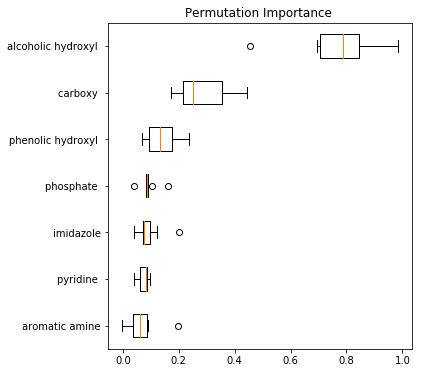

In [10]:
result = permutation_importance(reg, X, y, n_repeats=10,
                                random_state=42, n_jobs=5)
sorted_idx = result.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.boxplot(result.importances[sorted_idx[len(result.importances[sorted_idx])-20:len(result.importances[sorted_idx])]].T,
            vert=False, labels=np.array(headers)[sorted_idx[len(result.importances[sorted_idx])-20:len(result.importances[sorted_idx])]])
plt.title("Permutation Importance ")

plt.savefig(PLOT_NAME1, bbox_inches='tight',dpi=600)

In [11]:
#str_array=",".join(map(str,result.importances[sorted_idx].T))
#str_array1=",".join(map(str,np.array(headers)[sorted_idx]))
#str_array

In [12]:
     #   with open(TXT_NAME, 'w',encoding='utf-8') as w:
        #    w.write(str_array)
         #   w.write(str_array1)
         #   w.close()

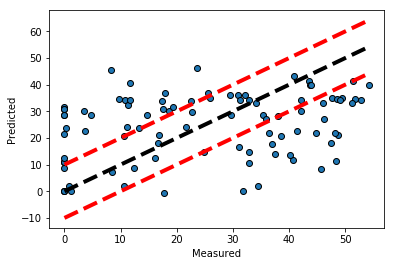

In [13]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
predicted = cross_val_predict(reg, features, labels, cv=10)
fig, ax = plt.subplots()
ax.scatter(labels, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.plot([y.min(), y.max()], [y.min()+10, y.max()+10], 'r--', lw=4)
ax.plot([y.min(), y.max()], [y.min()-10, y.max()-10], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Coefficients: 
 [11.69260207  0.         -0.          0.         -3.44004745  0.
 -0.         -0.         -0.         -0.          0.          0.
  0.        ]
模型截距:
20.165918051544395


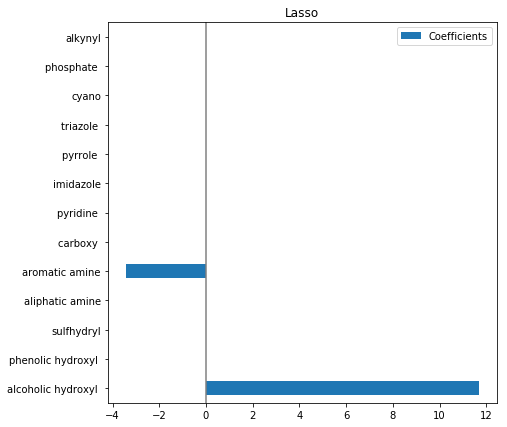

In [14]:
#Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
#localphfeature=np.array(origindata.iloc[:,:1])
clf = LassoCV().fit(X,y)

# Make predictions using the testing set


# The coefficients
print('Coefficients: \n', clf.coef_)
# 训练后模型截距
print('模型截距:')
print(clf.intercept_)
coefs1 = pd.DataFrame(
   clf.coef_,
    columns=['Coefficients'], index=headers
)
coefs1


coefs1.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)


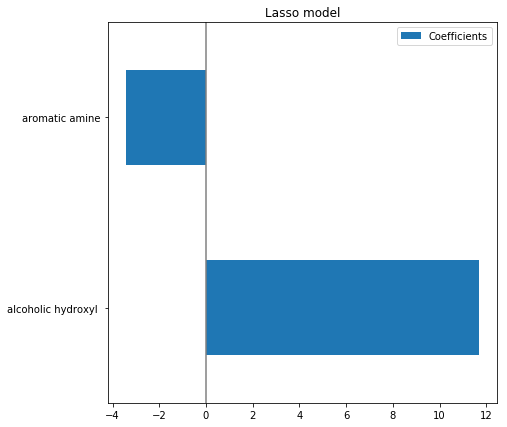

In [15]:
coefs1_copy=coefs1.iloc[[idx for idx in range(len(coefs1)) if coefs1.iloc[idx].values!=0.000 ]]
coefs1_copy.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.savefig(PLOT_NAME2, bbox_inches='tight',dpi=600)


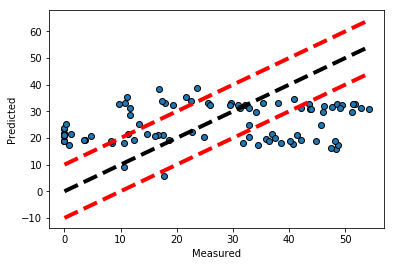

In [16]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
predicted = cross_val_predict(clf, features, labels, cv=10)
y=labels
fig, ax = plt.subplots()
ax.scatter(labels, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.plot([y.min(), y.max()], [y.min()+10, y.max()+10], 'r--', lw=4)
ax.plot([y.min(), y.max()], [y.min()-10, y.max()-10], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [17]:
y_pred2 = clf.predict(X_test)
y_pred2

array([20.16591805, 20.16591805, 20.16591805, 20.16591805, 20.16591805,
       20.16591805, 20.16591805, 20.16591805, 31.85852012, 20.16591805,
       20.16591805, 20.16591805, 20.16591805, 20.16591805, 20.16591805,
       20.16591805, 31.85852012, 31.85852012, 31.85852012, 31.85852012,
       31.85852012, 31.85852012, 31.85852012, 28.41847267])

In [18]:

#for not only localph
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
#localphfeature=np.array(origindata.iloc[:,:1])
from sklearn.linear_model import LinearRegression

regr =LinearRegression().fit(X,y)

In [19]:
y_pred3 = regr.predict(X_test)
y_pred3

array([19.39522501, 19.39522501, 19.39522501, 24.28533418, 24.28533418,
       24.28533418, 19.39522501, 19.39522501, 32.8585797 , 17.73236372,
       18.1408425 , 19.39522501, 19.39522501, 19.39522501, 17.73236372,
       17.73236372, 31.60419719, 36.49430636, 36.49430636, 31.60419719,
       36.49430636, 31.60419719, 33.26705848, 19.78125288])

In [20]:
from sklearn.ensemble import VotingRegressor
ereg = VotingRegressor([('gb', reg), ('rf', clf), ('lr', regr)])
ereg.fit(X, y)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=10,
                                                       min_samples_split=5,
                                                       n_estimators=2000)),
                            ('rf', LassoCV()), ('lr', LinearRegression())])

In [21]:

pred4 = ereg.predict(X_test)
pred4

array([21.76482546, 21.76482546, 21.76482546, 24.31200432, 24.31200432,
       24.31200432, 21.76482546, 21.76482546, 33.28217052, 15.0577606 ,
       20.32725352, 21.76482546, 21.76482546, 21.76482546, 15.0577606 ,
       15.0577606 , 32.86404302, 37.13189453, 37.13189453, 32.86404302,
       37.13189453, 32.86404302, 31.63233572, 28.97457837])

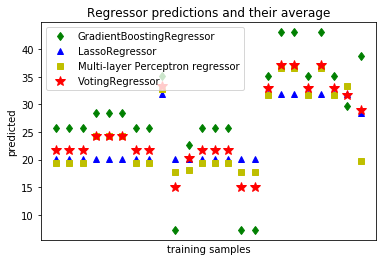

In [22]:
plt.figure()
plt.plot(y_pred, 'gd', label='GradientBoostingRegressor')
plt.plot(y_pred2, 'b^', label='LassoRegressor')
plt.plot(y_pred3, 'ys', label='Multi-layer Perceptron regressor')
plt.plot(pred4, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')
plt.savefig(PLOT_NAME4, bbox_inches='tight',dpi=600)
plt.show()

In [23]:
print('GradientBoostingRegressor predict result')
print(y_pred)

GradientBoostingRegressor predict result
[25.73333333 25.73333333 25.73333333 28.48476072 28.48476072 28.48476072
 25.73333333 25.73333333 35.12941175  7.27500003 22.675      25.73333333
 25.73333333 25.73333333  7.27500003  7.27500003 35.12941175 43.04285711
 43.04285711 35.12941175 43.04285711 35.12941175 29.77142856 38.76574916]


In [24]:
print('LassoRegressor predict result')
print(y_pred2)

LassoRegressor predict result
[20.16591805 20.16591805 20.16591805 20.16591805 20.16591805 20.16591805
 20.16591805 20.16591805 31.85852012 20.16591805 20.16591805 20.16591805
 20.16591805 20.16591805 20.16591805 20.16591805 31.85852012 31.85852012
 31.85852012 31.85852012 31.85852012 31.85852012 31.85852012 28.41847267]


In [25]:
print('Multi-layer Perceptron regressor predict result')
print(y_pred3)

Multi-layer Perceptron regressor predict result
[19.39522501 19.39522501 19.39522501 24.28533418 24.28533418 24.28533418
 19.39522501 19.39522501 32.8585797  17.73236372 18.1408425  19.39522501
 19.39522501 19.39522501 17.73236372 17.73236372 31.60419719 36.49430636
 36.49430636 31.60419719 36.49430636 31.60419719 33.26705848 19.78125288]


In [26]:
print('voting Regressor predict result')
print(pred4)

voting Regressor predict result
[21.76482546 21.76482546 21.76482546 24.31200432 24.31200432 24.31200432
 21.76482546 21.76482546 33.28217052 15.0577606  20.32725352 21.76482546
 21.76482546 21.76482546 15.0577606  15.0577606  32.86404302 37.13189453
 37.13189453 32.86404302 37.13189453 32.86404302 31.63233572 28.97457837]


In [27]:
        with open(TXT_NAME2, 'w',encoding='utf-8') as w:
            w.write(str(y_pred)+'\n')
            w.write(str(y_pred2)+'\n')
            w.write(str(y_pred3)+'\n')
            w.write(str(pred4)+'\n')
            w.close()